
# Invasive Species Monitoring

Use CNNs to identify the presence of invasive hydrangea in the given dataset

## Importing libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Samples from the training data

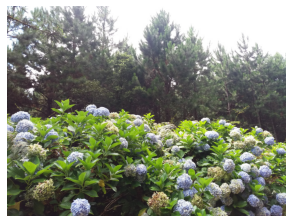

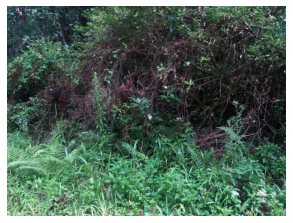

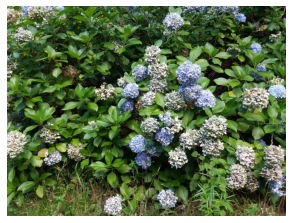

In [8]:
image=plt.imread('/content/drive/MyDrive/invasive-species-dataset/train/5.jpg')
fig=plt.figure(figsize=(5,10))
_=plt.imshow(image)
_=plt.axis('off')

image=plt.imread('/content/drive/MyDrive/invasive-species-dataset/train/6.jpg')
fig=plt.figure(figsize=(5,10))
_=plt.imshow(image)
_=plt.axis('off')

image=plt.imread('/content/drive/MyDrive/invasive-species-dataset/train/7.jpg')
fig=plt.figure(figsize=(5,10))
_=plt.imshow(image)
_=plt.axis('off')

### Importing data and pre-processing

In [3]:
traindf=pd.read_csv('/content/drive/MyDrive/invasive-species-dataset/train_labels.csv',dtype=str)

# Alternatively, this dataset can be found at https://www.kaggle.com/c/invasive-species-monitoring/overview

Append image extension for complete filename match

In [4]:
def append_ext(fn):
    return fn+".jpg"

traindf["name"]=traindf["name"].apply(append_ext)

In [5]:
print(traindf)

          name invasive
0        1.jpg        0
1        2.jpg        0
2        3.jpg        1
3        4.jpg        0
4        5.jpg        1
...        ...      ...
2290  2291.jpg        1
2291  2292.jpg        1
2292  2293.jpg        1
2293  2294.jpg        1
2294  2295.jpg        1

[2295 rows x 2 columns]


### Creating the training dataset

In [6]:
train_datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)

training_set=train_datagen.flow_from_dataframe(
dataframe=traindf,
directory="/content/drive/MyDrive/invasive-species-dataset/train/",
x_col="name",
y_col="invasive",
subset="training",
batch_size=32,
seed=42,
shuffle=True,
class_mode="binary",
target_size=(128,128))

Found 1722 validated image filenames belonging to 2 classes.


### Creating the validation dataset

In [7]:
validation_set=train_datagen.flow_from_dataframe(
dataframe=traindf,
directory="/content/drive/MyDrive/invasive-species-dataset/train/",
x_col="name",
y_col="invasive",
subset="validation",
batch_size=32,
seed=42,
shuffle=True,
class_mode="binary",
target_size=(128,128))

Found 573 validated image filenames belonging to 2 classes.


### Preprocessing the Test set

## Building the CNN

In [8]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

## Training

In [32]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

cnn.fit(x = training_set,validation_data = validation_set, epochs=20)

Epoch 1/20
54/54 [==============================] - 68s 1s/step - loss: 0.0762 - accuracy: 0.9814 - val_loss: 0.5664 - val_accuracy: 0.8168
Epoch 2/20
54/54 [==============================] - 66s 1s/step - loss: 0.0156 - accuracy: 0.9983 - val_loss: 0.6156 - val_accuracy: 0.8168
Epoch 3/20
54/54 [==============================] - 65s 1s/step - loss: 0.0110 - accuracy: 0.9988 - val_loss: 0.6249 - val_accuracy: 0.8202
Epoch 4/20
54/54 [==============================] - 65s 1s/step - loss: 0.0080 - accuracy: 0.9994 - val_loss: 0.5938 - val_accuracy: 0.8360
Epoch 5/20
54/54 [==============================] - 66s 1s/step - loss: 0.0062 - accuracy: 0.9994 - val_loss: 0.6919 - val_accuracy: 0.8255
Epoch 6/20
54/54 [==============================] - 65s 1s/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.7847 - val_accuracy: 0.8150
Epoch 7/20
54/54 [==============================] - 65s 1s/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.7665 - val_accuracy: 0.8220
Epoch 8/20
54/54 [==

## Testing on a sample
- Replace the image with any other image path
- This cell predicts whether or not the invasive plant (hydrangea) is present in the input picture

In [33]:
from keras.preprocessing import image

test_img = image.load_img('/content/drive/MyDrive/invasive-species-dataset/test/34.jpg', target_size = (128, 128))
test_img = image.img_to_array(test_img)
# extra dimension added to make a 'batch' with one image in it, axis : where do you want to add the extra dimension
test_img = np.expand_dims(test_img, axis = 0)
result = cnn.predict(test_img)
training_set.class_indices
# [0][0] because result is also in a batch
if result[0][0] == 1: 
  prediction = 'present'
else:
  prediction = 'absent'

print(prediction)

present


## Predicting results for the test set

In [34]:

batch_result = []

for i in range(1,1532):
  test_img = image.load_img('/content/drive/MyDrive/invasive-species-dataset/test/' + str(i) + '.jpg', target_size = (128, 128))
  test_img = image.img_to_array(test_img)
  # extra dimension added to make a 'batch' with one image in it, axis : where do you want to add the extra dimension
  test_img = np.expand_dims(test_img, axis = 0)
  result = cnn.predict(test_img)
  batch_result.append({'name': i, 'invasive': result[0][0]})

# result = cnn.predict(test_batch)

print(batch_result)



[{'name': 1, 'invasive': 1.0}, {'name': 2, 'invasive': 1.0}, {'name': 3, 'invasive': 1.0}, {'name': 4, 'invasive': 0.0}, {'name': 5, 'invasive': 1.0}, {'name': 6, 'invasive': 1.0}, {'name': 7, 'invasive': 1.0}, {'name': 8, 'invasive': 1.0}, {'name': 9, 'invasive': 1.0}, {'name': 10, 'invasive': 0.0}, {'name': 11, 'invasive': 0.0}, {'name': 12, 'invasive': 4.0375556e-26}, {'name': 13, 'invasive': 0.0}, {'name': 14, 'invasive': 1.0}, {'name': 15, 'invasive': 1.0}, {'name': 16, 'invasive': 1.0}, {'name': 17, 'invasive': 1.0}, {'name': 18, 'invasive': 1.0}, {'name': 19, 'invasive': 1.0}, {'name': 20, 'invasive': 0.0}, {'name': 21, 'invasive': 1.0}, {'name': 22, 'invasive': 0.0}, {'name': 23, 'invasive': 0.0}, {'name': 24, 'invasive': 1.0}, {'name': 25, 'invasive': 1.0}, {'name': 26, 'invasive': 1.0}, {'name': 27, 'invasive': 1.0}, {'name': 28, 'invasive': 1.0}, {'name': 29, 'invasive': 0.0}, {'name': 30, 'invasive': 0.0}, {'name': 31, 'invasive': 1.0}, {'name': 32, 'invasive': 0.0}, {'name

In [35]:
result_df = pd.DataFrame(batch_result)
result_df.to_csv('submission.csv', index=False)

from google.colab import files
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>